# TMA01, question 1 (40 marks)

**Name**: Mark Carroll

**PI**: F318958

In this question, you will investigate a dataset of current MPs, and create a plot showing how many male and female MPs came into the UK House of Commons each year.


The tasks in this notebook can be addressed using the techniques discussed in parts 2-6 of the module materials, and the associated notebooks.


The question has three parts, looking at different parts of the data analysis pipeline.

Record all your activity and observations in this notebook. Generate additional notebook cells as required.

Note that in this question you are required to use python; this is to give you experience with using pandas and dataframes to manipulate data.

In [1]:
# This cell imports some standard libraries you may need 
# for this question.

import pandas as pd
import numpy as np

import re

import glob

In [2]:
import matplotlib.pyplot as plt

#### Contents

[Data provenance, and importing the data](http://localhost:35180/notebooks/18j-tma01/2018J_TMA01_q1-Tutor_Notes.ipynb#Data-provenance,-and-importing-the-data)

[Cleaning and combining the data](http://localhost:35180/notebooks/18j-tma01/2018J_TMA01_q1-Tutor_Notes.ipynb#Cleaning-and-combining-the-data)

[Visualising the data](http://localhost:35180/notebooks/18j-tma01/2018J_TMA01_q1-Tutor_Notes.ipynb#Visualising-the-data)

### Data provenance, and importing the data

In this notebook, you will use two datasets. We have provided both for you here, but even when someone passes you a dataset, you need to be able to confirm your usage rights for that data.

#### 1. Licensing for the Houses of Parliament dataset

The first dataset is a csv file called `hop_mps.csv` in the `data` directory. This dataset was compiled using the UK parliament data service.

The data was downloaded from the Parliament data portal:

http://data.parliament.uk
    
on 4th April, 2018, and the file `hop_mps.csv` contains Parliamentary information licensed under the [Open Parliament Licence v3.0](https://www.parliament.uk/site-information/copyright/open-parliament-licence/).


Find the terms of this license, and state:
1. the specific clauses of the licence which allow the OU to distribute the data to you, and
2. the obligations that the licence places upon the OU when distributing the data.

*(2 marks)*


In [3]:
1. The Open Parliament Licence v3.0 states that anyone is free to copy, publish, distribute and transmit the information

2. The Open University is obligated to acknowledge the the source of the information as they have done so above.

SyntaxError: invalid syntax (<ipython-input-3-037555cac017>, line 1)

#### 2. Licensing for the Wikipedia dataset

The second dataset is also a csv file called `wikipedia_mps.csv` in the `data` directory. This dataset contains a csv file which was built using data downloaded from the wikipedia page:

https://en.wikipedia.org/wiki/List_of_MPs_for_constituencies_in_England_2017%E2%80%93present
    
on 4th April 2018, and is distributed to you under the [Creative Commons Attribution-ShareAlike License](https://creativecommons.org/licenses/by-sa/3.0/) (CC-SA).

With specific reference to the relevant clauses, explain why the `wikipedia_mps.csv` file is brought to you under the CC-SA. *(3 marks)*

In [4]:
# Write your answer in this cell
this is a test for backup purposes

SyntaxError: invalid syntax (<ipython-input-4-bcd5331b534e>, line 2)

#### 3. Importing the datasets

Import the file `hop_mps.csv` into a dataframe named `hop_df`. 

Display a preview of the first five rows of the dataframe. *(1 mark)*

In [5]:
## read in hop_mps.csv file
hop_df = pd.read_csv('data/hop_mps.csv',encoding="utf-8")
## sort values alphabetically
hop_df = hop_df.sort_values('Member from')
## reset index values
hop_df = hop_df.reset_index(drop=True)
## display first five lines
hop_df[:5]

,Member name,Member from,Party,Gender
0,Stephen Kinnock,Aberavon,Labour,M
1,Guto Bebb,Aberconwy,Conservative,M
2,Kirsty Blackman,Aberdeen North,Scottish National Party,F
3,Ross Thomson,Aberdeen South,Conservative,M
4,Neil Gray,Airdrie and Shotts,Scottish National Party,M


Import the file `wikipedia_mps.csv` into a dataframe named `wiki_df`.

Display a preview of the first five rows of the dataframe. *(1 mark)*

In [6]:
## read in wiki file
wiki_df = pd.read_csv('data/wikipedia_mps.csv', encoding="utf-8")
## sort values alphabetically
wiki_df = wiki_df.sort_values('Constituency')
## reset index values
wiki_df = wiki_df.reset_index(drop=True)
## display first five lines
wiki_df[:5]

,MP,Constituency,Party,In constituency since
0,Stephen Kinnock,Aberavon,Labour Party,2015
1,Guto Bebb,Aberconwy,Conservative Party,2010
2,Kirsty Blackman,Aberdeen North,Scottish National Party,2015
3,Callum McCaig,Aberdeen South,Scottish National Party,2015
4,Neil Gray,Airdrie & Shotts,Scottish National Party,2015


At this point it was noted that there is a discrepancy in the mp for Aberdeen South
this was caused by the Wikipedia data being out of date when sampled. further investigation showed many discrepancies in the wikipedia data therefore rather than manually fix this it was decided to reaquire the data from the updated wiki page.

In [7]:
## read in wiki file
wiki_df = pd.read_csv('data/wiki_new.csv', encoding="utf-8")
## sort values alphabetically
wiki_df = wiki_df.sort_values('Constituency')
## reset index values
wiki_df = wiki_df.reset_index(drop=True)
## display first five lines
wiki_df[:5]

,MP,Constituency,Party,In constituency since
0,Stephen Kinnock,Aberavon,Labour,2015
1,Guto Bebb,Aberconwy,Conservative,2010
2,Kirsty Blackman,Aberdeen North,Scottish National Party,2015
3,Ross Thomson,Aberdeen South,Scottish Conservative Party,2017
4,Neil Gray,Airdrie & Shotts,Scottish National Party,2015


### Cleaning and combining the data

In order to build our visualisation, we will need to join the two dataframes on the column containing the parliamentary constituency. In order to do this, it is important that the column in each dataframe contains the same values.

#### 4. Identifying discrepancies between the datasets

If you investigate the two datasets, you will find that there are some inconsistencies in how the constituency names are written.

Using python, generate a list of all the constituency names which appear in `hop_df` but which do not appear in `wiki_df`. Then generate a list of all the constituency names which appear in `wiki_df` but which do not appear in `hop_df`. *(5 marks)*

In [8]:
hop_dif = []
for x in hop_df.index:
    if hop_df.at[x,'Member from'] != wiki_df.at[x,'Constituency']:
        hop_dif.insert(x,hop_df.at[x,'Member from'])
hop_dif

['Airdrie and Shotts',
 'Birmingham, Edgbaston',
 'Birmingham, Erdington',
 'Birmingham, Hall Green',
 'Birmingham, Hodge Hill',
 'Birmingham, Ladywood',
 'Birmingham, Northfield',
 'Birmingham, Perry Barr',
 'Birmingham, Selly Oak',
 'Birmingham, Yardley',
 'Brighton, Kemptown',
 'Brighton, Pavilion',
 'Ealing, Southall',
 'Edinburgh North and Leith',
 'Enfield, Southgate',
 'Huntingdon',
 'Hyndburn',
 'Ilford North',
 'Ilford South',
 'Inverclyde',
 'Inverness, Nairn, Badenoch and Strathspey',
 'Ipswich',
 'Isle of Wight',
 'Islington North',
 'Islington South and Finsbury',
 'Islwyn',
 'Jarrow',
 'Keighley',
 'Kenilworth and Southam',
 'Kensington',
 'Kettering',
 'Kilmarnock and Loudoun',
 'Kingston and Surbiton',
 'Kingston upon Hull East',
 'Kingston upon Hull North',
 'Kingston upon Hull West and Hessle',
 'Lewisham East',
 'Lewisham West and Penge',
 'Lewisham, Deptford',
 'Liverpool, Riverside',
 'Liverpool, Walton',
 'Liverpool, Wavertree',
 'Liverpool, West Derby',
 'Manches

In [9]:
wiki_dif = []
for x in hop_df.index:
    if wiki_df.at[x,'Constituency'] != hop_df.at[x,'Member from']:
        wiki_dif.insert(x,wiki_df.at[x,'Constituency'])
wiki_dif

['Airdrie & Shotts',
 'Birmingham Edgbaston',
 'Birmingham Erdington',
 'Birmingham Hall Green',
 'Birmingham Hodge Hill',
 'Birmingham Ladywood',
 'Birmingham Northfield',
 'Birmingham Perry Barr',
 'Birmingham Selly Oak',
 'Birmingham Yardley',
 'Brighton Kemptown',
 'Brighton Pavilion',
 'Ealing Southall',
 'Edinburgh North & Leith',
 'Enfield Southgate',
 'Hull East',
 'Hull North',
 'Hull West and Hessle',
 'Huntingdon',
 'Hyndburn',
 'Ilford North',
 'Ilford South',
 'Inverclyde',
 'Inverness, Nairn, Badenoch and Strathspey',
 'Ipswich',
 'Isle of Wight',
 'Islington North',
 'Islington South and Finsbury',
 'Islwyn',
 'Jarrow',
 'Keighley',
 'Kenilworth and Southam',
 'Kensington',
 'Kettering',
 'Kilmarnock and Loudoun',
 'Kingston and Surbiton',
 'Lewisham Deptford',
 'Lewisham East',
 'Lewisham West and Penge',
 'Liverpool Riverside',
 'Liverpool Walton',
 'Liverpool Wavertree',
 'Liverpool West Derby',
 'Manchester Gorton',
 'Manchester Withington',
 'Plymouth Moor View',
 '

#### 5. Correcting discrepancies between the datasets

Update the `wiki_df` table so that where there is a discrepancy between the constituency name in `wiki_df` and `hop_df`, the value in `wiki_df` is changed so that the two columns match. 

Display an appropriate number of rows of `wiki_df`, so that it is clear what difference has been made. *(8 marks)*

**Hint**: If your answers to the two previous questions are returned in alphabetical order, you should be able to map from one to another by the index position in the list.

After inspection of the lists it appears some are out of order
this is due to the naming conventions and puctuation diferences between the two lists
to correct this i decided to manually edit the 5 fields in the wiki_df that caused the problem.

In [10]:
## correcting naming differences
wiki_df['Constituency'] = wiki_df['Constituency'].str.replace('Hull','Kingston upon Hull')
wiki_df['Constituency'] = wiki_df['Constituency'].str.replace('Sheffield Brightside and Hillsborough','Sheffield, Brightside and Hillsborough')
wiki_df['Constituency'] = wiki_df['Constituency'].str.replace('Sheffield Hallam','Sheffield, Hallam')
wiki_df['Constituency'] = wiki_df['Constituency'].str.replace('Sheffield Heeley','Sheffield, Heeley')
wiki_df['Constituency'] = wiki_df['Constituency'].str.replace('Lewisham Deptford','Lewisham, Deptford')

In [11]:
## sort values alphabetically
wiki_df = wiki_df.sort_values('Constituency')
## reset index values
wiki_df = wiki_df.reset_index(drop=True)
## rerun the original code to detect diferences
wiki_dif = []
for x in wiki_df.index:
    if wiki_df.at[x,'Constituency'] != hop_df.at[x,'Member from']:
        wiki_dif.insert(x,wiki_df.at[x,'Constituency'])
wiki_dif

['Airdrie & Shotts',
 'Birmingham Edgbaston',
 'Birmingham Erdington',
 'Birmingham Hall Green',
 'Birmingham Hodge Hill',
 'Birmingham Ladywood',
 'Birmingham Northfield',
 'Birmingham Perry Barr',
 'Birmingham Selly Oak',
 'Birmingham Yardley',
 'Brighton Kemptown',
 'Brighton Pavilion',
 'Ealing Southall',
 'Edinburgh North & Leith',
 'Enfield Southgate',
 'Liverpool Riverside',
 'Liverpool Walton',
 'Liverpool Wavertree',
 'Liverpool West Derby',
 'Manchester Gorton',
 'Manchester Withington',
 'Plymouth Moor View',
 'Plymouth Sutton and Devonport',
 'Ross, Skye & Lochaber',
 'Southampton Itchen',
 'Southampton Test']

In [12]:
## rerunning code to compare list
hop_dif = []
for x in hop_df.index:
    if hop_df.at[x,'Member from'] != wiki_df.at[x,'Constituency']:
        hop_dif.insert(x,hop_df.at[x,'Member from'])
hop_dif

['Airdrie and Shotts',
 'Birmingham, Edgbaston',
 'Birmingham, Erdington',
 'Birmingham, Hall Green',
 'Birmingham, Hodge Hill',
 'Birmingham, Ladywood',
 'Birmingham, Northfield',
 'Birmingham, Perry Barr',
 'Birmingham, Selly Oak',
 'Birmingham, Yardley',
 'Brighton, Kemptown',
 'Brighton, Pavilion',
 'Ealing, Southall',
 'Edinburgh North and Leith',
 'Enfield, Southgate',
 'Liverpool, Riverside',
 'Liverpool, Walton',
 'Liverpool, Wavertree',
 'Liverpool, West Derby',
 'Manchester, Gorton',
 'Manchester, Withington',
 'Plymouth, Moor View',
 'Plymouth, Sutton and Devonport',
 'Ross, Skye and Lochaber',
 'Southampton, Itchen',
 'Southampton, Test']

All values are based upon punctuation and are in the correct order therefore can be copied over via index

In [13]:
## copies values from hop_df to wiki_df wher they are different
for x in wiki_df.index:
    if wiki_df.at[x,'Constituency'] != hop_df.at[x,'Member from']:
        wiki_df.at[x,'Constituency'] = hop_df.iloc[x]['Member from']

In [14]:
## final comparason to ensure no further discrepancies exist
hop_dif = []
for x in hop_df.index:
    if hop_df.at[x,'Member from'] != wiki_df.at[x,'Constituency']:
        hop_dif.insert(x,hop_df.at[x,'Member from'])
hop_dif

[]

#### 6. Correcting typing information

Next, you notice that the values in the `In constituency since` column of `wiki_df` are strings, whereas you would prefer them to be integers.

Using python, update `wiki_df` so that the `In constituency since` column contains integer values rather than strings. *(6 marks)*

Note, in python, you can call the `int` function on a single string to convert it to an integer:

<code>int('1') -> 1</code>

or the `astype(int)` method on a pandas Series to convert all the values to integers:

<code>pd.Series(['1', '2', '3']).astype(int) -> pd.Series(1, 2, 3)

**Hint:** If you get an error you may need to further clean your data.

In [15]:
## strips leters from the in constituency since string
for x in wiki_df.index:
    wiki_df.at[x, 'In constituency since'] = re.sub('[^0-9]','', wiki_df.iloc[x]['In constituency since'])
## converts string to integer values
wiki_df['In constituency since'] = pd.to_numeric(wiki_df['In constituency since'], errors='coerce').fillna(0).astype(np.int64)

In [16]:
wiki_df.dtypes

MP                       object
Constituency             object
Party                    object
In constituency since     int64
dtype: object

#### 7. Combining the datasets

Now you need to create a dataframe which contains the data in a suitable form for plotting. Create a dataframe called `plot_df`, which has three columns:

1. a column containing the name of a constituency
1. a column containing the gender of the MP sitting in that constituency
1. a column containing the year that the MP came to that constituency

You should then ensure that the dataframe is correctly populated: for each constituency, there should be a row in `plot_df` containing the constituency name, the gender of the sitting MP, and the year that the MP came to the constituency, in the appropriate columns.

*(2 marks)*

In [17]:
## create plot_df
plot_df = pd.concat([hop_df['Member from'],hop_df['Gender'],wiki_df['In constituency since']], axis=1, keys=['Constituency','Gender','Year'])
plot_df[:5]

,Constituency,Gender,Year
0,Aberavon,M,2015
1,Aberconwy,M,2010
2,Aberdeen North,F,2015
3,Aberdeen South,M,2017
4,Airdrie and Shotts,M,2015


### Visualising the data

For the current members of parliament, you would like to know how many MPs came into the House of Commons in each year,  how many of those were female, and how many were male.

#### 8. Plot the datasets

For the current members of parliament, you would like to know how many MPs came into the House of Commons in each year,  how many of those were female, and how many were male.

You decide to plot the data in bar chart, where:

- The x axis should show years in the range covered by the dataset

- The y axis should show the number of MPs admitted to the House of Commons in that year.

- There should be two sets of bars: one showing the number of female MPs entering the commons that year, and one showing the number of male MPs entering the commons that year.

- The graph should have an appropriate title, axis labels, and legend.

Remember that for this question, your solution must be carried out in python: you must provide python commands which generate the required plot from the `plot_df` dataframe.

*(12 marks)*

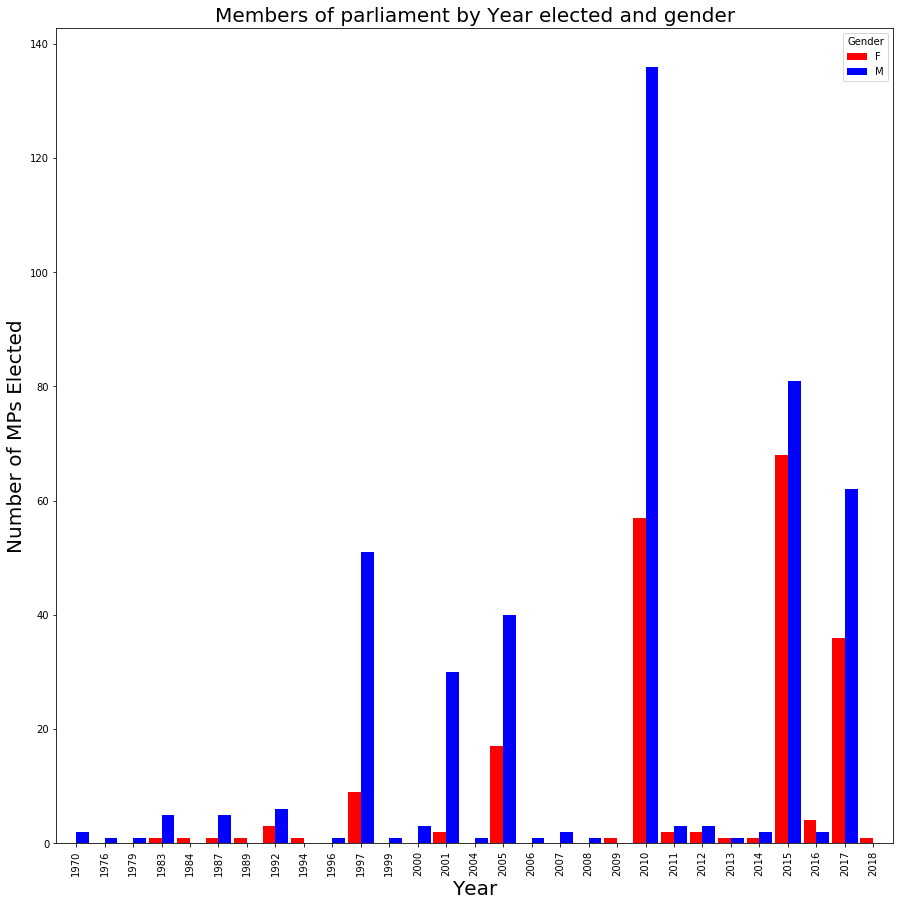

In [18]:
plot = plot_df.groupby(["Year",
                        "Gender"])["Constituency"].count().reset_index(name='count').pivot(columns='Gender', 
                                                                                                  values='count', 
                                                                                                  index='Year').fillna(0).plot.bar(width=0.9,
                                                                                                                                   color=('r','b'),
                                                                                                                                   figsize=(15,15))
plt.xlabel('Year').set_fontsize(20)
plt.ylabel('Number of MPs Elected').set_fontsize(20)
plt.title("Members of parliament by Year elected and gender").set_fontsize(20)

From this visualisation it can be seen that the number of female mps in comparason to male mps has been increasing steadily with large increses in the female representation in th previous three general ellections